# Applied Statistics (ECS764P): Lab 4

## Question 1:

You will first download the world GDP data from the World Bank using pandas_datareader.
The following code will download and plot the entire world GDP time series. Do NOT make any local
copies of your data!

from pandas_datareader import wb
import matplotlib.pyplot as plt
import numpy as np

gdp_data = wb.download(indicator='NY.GDP.MKTP.CD', country='WLD', start='1960', end='2021')
time = np.arange(1960, 2022)
gdp = gdp_data.iloc[:, 0].astype(float).to_numpy()
#Data is returned in inverse chronological order, so reverse order
gdp = np.flip(gdp)
#Plot world GDP data against time
plt.plot(time, gdp, label='World GDP')
plt.legend()
plt.show()

(you can ignore the warning about the code ‘WLD’). You will try to estimate the long-term annual growth
rate of the world using a regression.

(a) If the growth rate was a constant r, then the world’s GDP would grow as

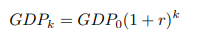

where k is the number of years since 1960 and GDP0 is the world’s GDP in 1960. This is clearly not a linear relationship between time (k, in years) and GDP. However, we can get a linear relationship by applying a simple transformation f(−) on both side of the equation. What is this transformation? (Hint: we used this transformation in the context of MLE, it turns products into sums.)

(b) Apply this transformation f(−) to the GDP data, and perform a regression against the time variable. On the same plot, display your regression line, a scatter-plot of the (transformed) data points, and your R2 value.

(c) Compute the residuals of your regression (i.e. the difference between the model and the observations), and print their mean and their standard deviation σˆ. Perform a KS-test to determine whether we can reject the null hypothesis that the residuals are sampled from a normal distribution with mean 0 and standard deviation σˆ. Take α = 99%.

(d) You will now apply the inverse of the transformation f(−) to your linear model in order to get a non-linear model for the GDP. On the same plot, display your (non-linear) model and a scatter-plot of the (original) data points.

(e) What is the relationship between the slope of the regression and the long-term growth rate of the world GDP? Compute the long-term growth rate of the world GDP.

(f) What do you observe since approximately 2015?

C:\Users\Sayali\anaconda3\Lib\site-packages\pandas_datareader\wb.py:592: UserWarning: Non-standard ISO country codes: WLD
  warnings.warn(


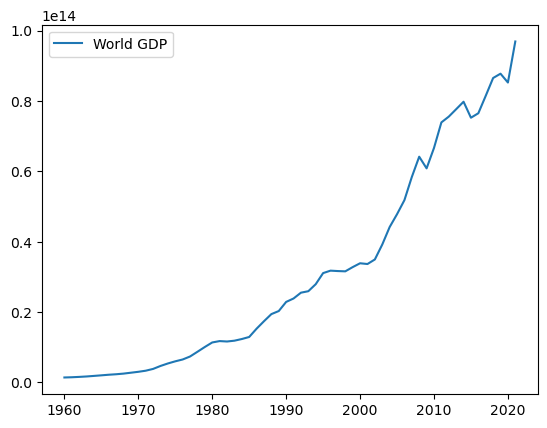

In [1]:
from pandas_datareader import wb
import matplotlib.pyplot as plt
import numpy as np

gdp_data = wb.download(indicator='NY.GDP.MKTP.CD', country='WLD', start='1960', end='2021')
time = np.arange(1960, 2022)
gdp = gdp_data.iloc[:, 0].astype(float).to_numpy()

# Data is returned in inverse chronological order, so reverse order
gdp = np.flip(gdp)

# Plot world GDP data against time
plt.plot(time, gdp, label='World GDP')
plt.legend()
plt.show()


We have downloaded the dataset of the "World Bank data for the Gross Domestic Product (GDP)". "country='WLD'" specifies that it is a data of the entire world, and hence we have changed the label to "World GDP" insteed of "US GDP". The data that we have retreived and will be using for the estimation of long-term annual growth rate using regression, is from 1960 to 2022. We have reversed the order of GDP values in order to align those values with the chronological order of the time variable. This is because, the data that we have extracted returns the GDP values from most recent to the most oldest order.

## Part a:

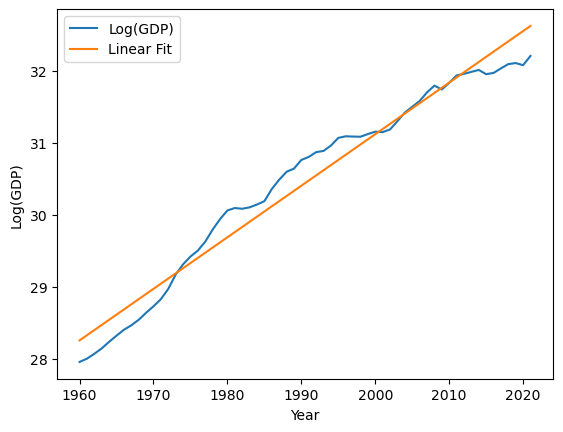

In [2]:
# Calculate the logarithm of GDP
log_gdp = np.log(gdp)

# Create a variable representing the number of years since 1960
years_since_1960 = time - 1960

# Create a matrix for linear regression
X = np.vstack([np.ones_like(years_since_1960), years_since_1960]).T

# Use linear regression to estimate parameters
params = np.linalg.lstsq(X, log_gdp, rcond=None)[0]

# Extract intercept and slope
intercept, slope = params

# Predict the logarithm of GDP using the linear model
predicted_log_gdp = X @ params

# Plot the original data and the linear fit in log scale
plt.plot(time, log_gdp, label='Log(GDP)')
plt.plot(time, predicted_log_gdp, label='Linear Fit')
plt.xlabel('Year')
plt.ylabel('Log(GDP)')
plt.legend()
plt.show()


We have transformed the formula for GDP by using logarithm. This is because, we can transform a product into a sum, which will be easy for us to determine the linear relationship. We will get the below equation after transforming the original equation:

ln(GDPk)=ln(GDP0)+k⋅ln(1+r)

We have described the ln(GDPk) as a variable log_gdp, the k here is nothing but the total years that have passed since 1960, which is nothing but the variable years_since_1960. Here np.ones_like(years_since_1960) is nothing but the ln(GDP0), which is then represented in the form of a matrix using k. np.ones_like(years_since_1960) adds the ones to help us create a matrix, which will be needed for the intercept term in our linear regression. The params specifies the estimated parameters for the intercept ln(GDP0) and slope ln(1+r). Here we have used the least square method. Then we gather the predicted values of ln(GDPk) based on the linear regression model.

The linear regression line is fitting to the data in a logarithmic space, which is having the initial value of intercept as ln(GDP0) and value of slope is ln(1+r).

## Part b:

R-squared =  0.9656784695439938


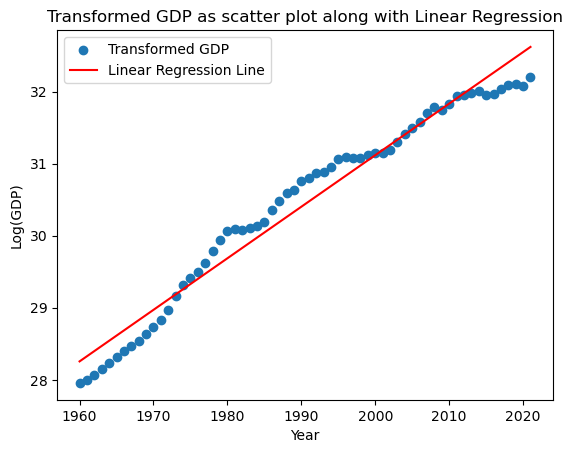

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Reshape the data for sklearn LinearRegression
X = years_since_1960.reshape(-1, 1)
y = log_gdp

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predicted_log_gdp = model.predict(X)

# Calculate R-squared value
r2 = r2_score(y, predicted_log_gdp)
print("R-squared = ",r2)

# Plot the original data, regression line, and scatter plot
plt.scatter(time, log_gdp, label='Transformed GDP')
plt.plot(time, predicted_log_gdp, color='red', label='Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('Log(GDP)')
plt.title(f'Transformed GDP as scatter plot along with Linear Regression')
plt.legend()
plt.show()


Here we have actually implemented the linear regression algorithm. In order to do so, we have converted the matrix which contains the intercept, into a 2D array, as this is required for the linear regression model. The r-squared value that tells us how the linear regression explains the variance in the log(GDP) data. 

As required we have plotted the previously designed and transformed GDP into scatter plot, and the linear regression line fits the scatter plot.

## Part c:

In [4]:
from scipy.stats import linregress, ks_2samp

# Perform linear regression to estimate parameters
slope, intercept, _, _, _ = linregress(time, log_gdp)

# Calculate the regression line
regression_line = intercept + slope * time

# Calculate residuals
residuals = log_gdp - regression_line

# Print mean and standard deviation of residuals
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)

print(f"Mean of Residuals: {mean_residuals:.4f}")
print(f"Standard Deviation of Residuals (\u03C3\u0302): {std_residuals:.4f}")

# Perform KS-test
ks_statistic, ks_p_value = ks_2samp(residuals, np.random.normal(mean_residuals, std_residuals, len(residuals)))

# Display KS-test results
alpha = 0.01  # significance level
print(f"\nKS-Test:")
print(f"KS Statistic: {ks_statistic:.4f}")
print(f"P-value: {ks_p_value:.4f}")

# Check if null hypothesis can be rejected
if ks_p_value < alpha:
    print("Reject the null hypothesis (Residuals are not sampled from a normal distribution with mean 0 and standard deviation \u03C3\u0302).")
else:
    print("Do not reject the null hypothesis.")


Mean of Residuals: 0.0000
Standard Deviation of Residuals (σ̂): 0.2414

KS-Test:
KS Statistic: 0.1613
P-value: 0.3981
Do not reject the null hypothesis.


We need to perform the linear regression in order to determine the whether residuals follow a normal distribution with the line of regression. This is nothing but the definition of KS-test. Based on the estimated intercept and slop, the vaules of regression line are calculated and then the residual values are calculated by subtracting predicted values from the regression line from log(GDP). Then we have the mean and standard deviations of the residuals, and then we compute the values of KS Statistic and KS P-value in order to determine whether the residuals follow normal distribution with the mean and standars deviation or not. As we need to specify the value of significance level as 99%, we have pre-determined it as 0.01. Based on KS P-value and significance level, we also have determined if we reject the null hypothesis, or we do not reject the null hypothesis.

As the result, we have mean which is 0 and standard deviation is 0.2414 which is low. This indicates that the residuals are centered around the regression line and residuals are relatively close to the regression line respectively. The KS Statistic gives us the maximum vertical distance between the CDF of the residuals and the CDF of a normal distribution. The P-value gives us the detemination whether to reject the null hypothesis or not to reject the null hypothesis. In our case, the P-value suggests that there is no proper evidence to reject the null hypothesis. So, we do not reject the null hypothesis.

## Part d:

R-Squared =  0.7966707149938057


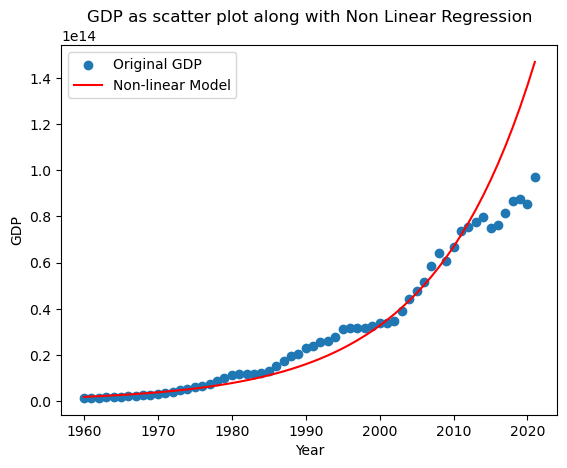

In [5]:
# Inverse of the transformation to get non-linear predictions
predicted_gdp = np.exp(predicted_log_gdp)

# Calculate R-squared value
r2 = r2_score(gdp, predicted_gdp)
print("R-Squared = ",r2)

# Plot the original data, linear and non-linear models
plt.scatter(time, gdp, label='Original GDP')
plt.plot(time, predicted_gdp, color='red', label='Non-linear Model')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title("GDP as scatter plot along with Non Linear Regression")
plt.legend()
plt.show()


If we take the exponential inverse of the predictions made while using linear regression on log(GDP), we can get a non-linear transformation to the GDP dataset. Here, we have a visual representation of the non-linear model fitted to the original GDP and also we have evaluated its performance using the R-squared value.

The R-squared value that we achived earlier was higher than that we achived now. The drop in R-squared from 0.9656784695439938 to 0.7966707149938057 indicates that the linear model was more appropriate for the log-transformed data, and the exponential transformation did not significantly improve the fit. We can say that the relationship between time and GDP was better captured by a linear model on the logarithmic scale, suggesting a multiplicative growth pattern. 

## Part e:

In [6]:
# Extract the slope from the linear regression model
slope = model.coef_[0]

# Calculate the long-term growth rate
long_term_growth_rate = np.exp(slope) - 1

print(f"Long-term Growth Rate: {long_term_growth_rate:.4%}")


Long-term Growth Rate: 7.4189%


We can determine this relationship by expressing the relationship between exponential growth model and the linear regression model. We have computed the long term growth rate using the slope. As the result is in positive terms, we can say that the GDP is expected to grow over time. 

## Part f:

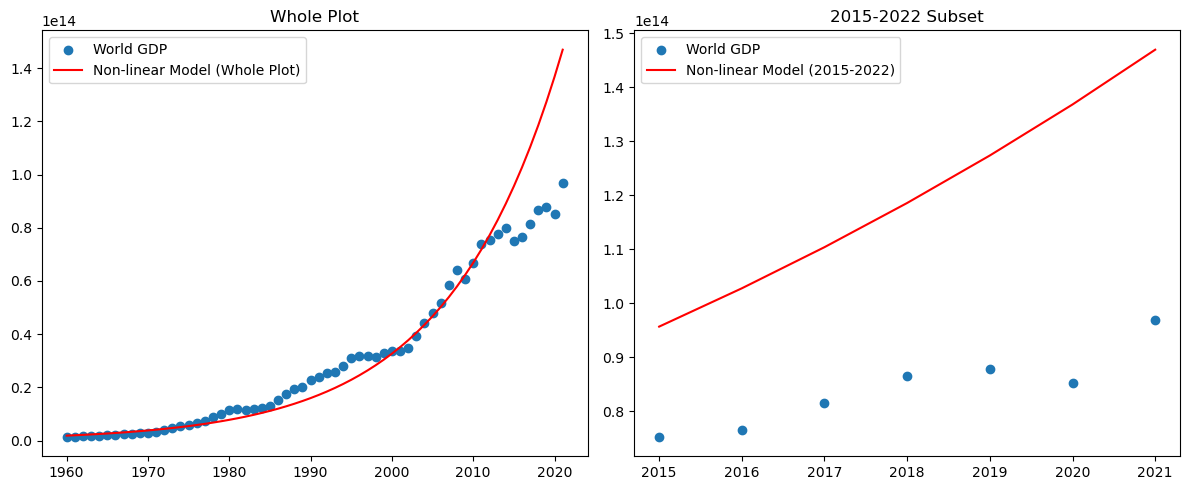

In [7]:
# Create a new array for time from 2015 to 2022
time_subset = np.arange(2015, 2022)

# Calculate the regression line only for the subset of time
regression_line_subset = intercept + slope * time_subset

# Apply inverse transformation to get non-linear model only for the subset of time
nonlinear_model_subset = np.exp(regression_line_subset)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot the original world GDP data against time
axs[0].scatter(time, gdp, label='World GDP')  # Scatter plot of original data
axs[0].plot(time, np.exp(intercept + slope * time), color='red', label='Non-linear Model (Whole Plot)')
axs[0].legend()
axs[0].set_title('Whole Plot')

# Plot the 2015-2022 subset
axs[1].scatter(time_subset, gdp[-len(time_subset):], label='World GDP')  # Scatter plot of original data
axs[1].plot(time_subset, nonlinear_model_subset, color='red', label='Non-linear Model (2015-2022)')
axs[1].legend()
axs[1].set_title('2015-2022 Subset')

# Display the plots
plt.tight_layout()
plt.show()


Here, we have plotted the whole trend from year 1960 till 2022 and the other plot is from year 2015 till 2022. 

We can observe that the non linear model is not able to capture the underlying patterns in the data equally well across different time period. From the second plot, we can observe that none of the points in the scatter plot for the subset of 2015-2022 appear to lie on the non-linear model. By this we can say that the model fitted to the entire dataset do not generalize well to the more recent years. We can also state that the underlying growth patter could have changed. In the first plot we can see that the non-linear model fits the scatter plot well until around 2010, but after that, the scatter plot diverges towards the right side of the regression line. This can be due to the change in the growth pattern or the factors that may affect the growth of GDP. 

## Question 2:

In this question you will study the distribution of the slope and intercept parameters of a
linear model. Consider the following model
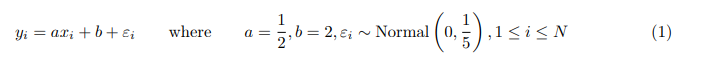

For the purpose of this exercise you will take N = 200 and generate the xis by
x = np.linspace(−5, 5, 200)

(a) Generate 10000 sets of error vectors εi and use them to perform 10000 linear regression of the Ndimensional vectors (yi) against (xi), where yi is given by (1).

(b) Collect the slopes and the intercepts of these 10000 linear regressions and plot their histograms against their respective theoretical densities given in the lecture. What do you observe?

(c) For each of the 10000 regression, compute the test statistic for the slope and for the intercept (given in the lecture) and plot their histograms against their theoretical density (also given in the lecture). What do you observe?

(d) Take the last of your regressions and perform the following two tests with α = 99% (you may use either p-values or critical regions but make sure you think about whether this is a one-sided or two-sided test). First test: H0 : a = 1/2 (assuming b = 2)
Second test: H0 : b = 2 (assuming a =1/2)

(e) Change the model to
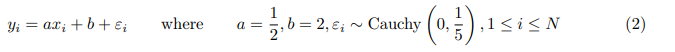

Perform another 10000 regressions based on this model. Collect the slopes and intercepts of these regressions as well as the associated statistics. Plot their histograms. What do you observe?

## Part a:

In [8]:
# Parameters
a = 1/2
b = 2
epsilon_std = np.sqrt(1/5)
N = 200
num_simulations = 10000

# Generate x values
x = np.linspace(-5, 5, N)

# Initialize arrays to store slope and intercept values
slope_values = np.zeros(num_simulations)
intercept_values = np.zeros(num_simulations)

# Perform linear regression simulations
for i in range(num_simulations):
    # Generate error vector epsilon
    epsilon = np.random.normal(0, epsilon_std, N)
    
    # Generate yi values
    y = a * x + b + epsilon
    
    # Reshape x to a column vector
    X = x.reshape(-1, 1)
    
    # Fit linear regression model
    model = LinearRegression().fit(X, y)
    
    # Store slope and intercept values
    slope_values[i] = model.coef_[0]
    intercept_values[i] = model.intercept_

# Now, slope_values and intercept_values contain the distribution of slopes and intercepts


In the above code, we have generated 10000 sets of error vectors "epsilon" and by using them, we have performed linear regression on the given (x,y) pairs. The distributions of slops and intercepts are then stored in arrays "slope_values" and "intercept_values". 

## Part b:

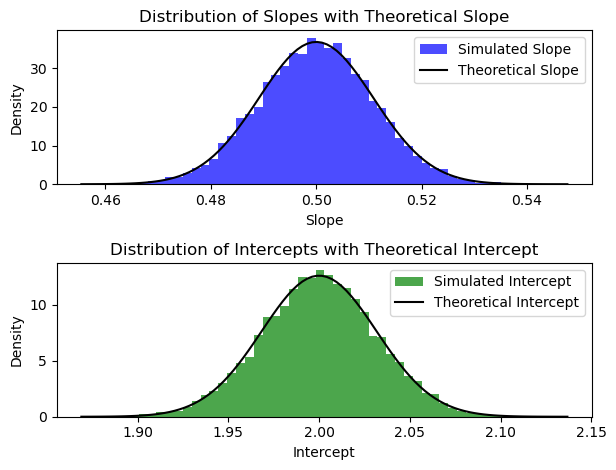

Mean of Slopes =  0.4999669393847016
Mean of Intercepts =  1.999988815096087


In [9]:
from scipy.stats import norm

# Plot histogram for accumulated slopes
plt.subplot(2, 1, 1)
all_slopes = slope_values.flatten()  # Flatten all slopes
plt.hist(all_slopes, bins=50, density=True, color='blue', alpha=0.7, label='Simulated Slope')

# Plot bell curve for theoretical slope
xmin, xmax = plt.xlim()
x_range = np.linspace(xmin, xmax, 100)
slope_theoretical_density = norm.pdf(x_range, loc=a, scale=np.std(all_slopes))
plt.plot(x_range, slope_theoretical_density, 'k', label='Theoretical Slope')
plt.title('Distribution of Slopes with Theoretical Slope')
plt.xlabel('Slope')
plt.ylabel('Density')
plt.legend()

# Plot histogram for accumulated intercepts
plt.subplot(2, 1, 2)
all_intercepts = intercept_values.flatten()  # Flatten all intercepts
plt.hist(all_intercepts, bins=50, density=True, color='green', alpha=0.7, label='Simulated Intercept')

# Plot bell curve for theoretical intercept
xmin, xmax = plt.xlim()
x_range = np.linspace(xmin, xmax, 100)
intercept_theoretical_density = norm.pdf(x_range, loc=b, scale=np.std(all_intercepts))
plt.plot(x_range, intercept_theoretical_density, 'k', label='Theoretical Intercept')
plt.title('Distribution of Intercepts with Theoretical Intercept')
plt.xlabel('Intercept')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

print("Mean of Slopes = ", np.mean(slope_values))
print("Mean of Intercepts = ", np.mean(intercept_values))

Here, we have generated two subplots, the first one is the distribution of slopes and the second is the distribution of intercepts. The plots shows us the histograms of the simulated values along with the theoretical density which is represented by the bell curve. We can see that both the simulated values and their respective theoretical densities of both slopes and intercepts are in the form of normal distribution. We can also see that the mean of simulated values is converging to that of the theoretical values. This is also because of the high number of simulations performed, due to which we get the mean of simulated values getting converged to that of the theoretical values, which is because of the property of Linear Regression where the slope and intercepts are unbiased. Since the histograms of simulated slopes and intercepts are in the form of a normal distribution showing a bell curve, it is getting aligned with the "Central Limit Theorem". This is because, our simulated slopes and intecepts are getting affected by the distribution of the error term which is also a normal distribution. We can also observe that all the values of the simulated slopes and intercepts are consistent with that of the theoretical values.

## Part c:

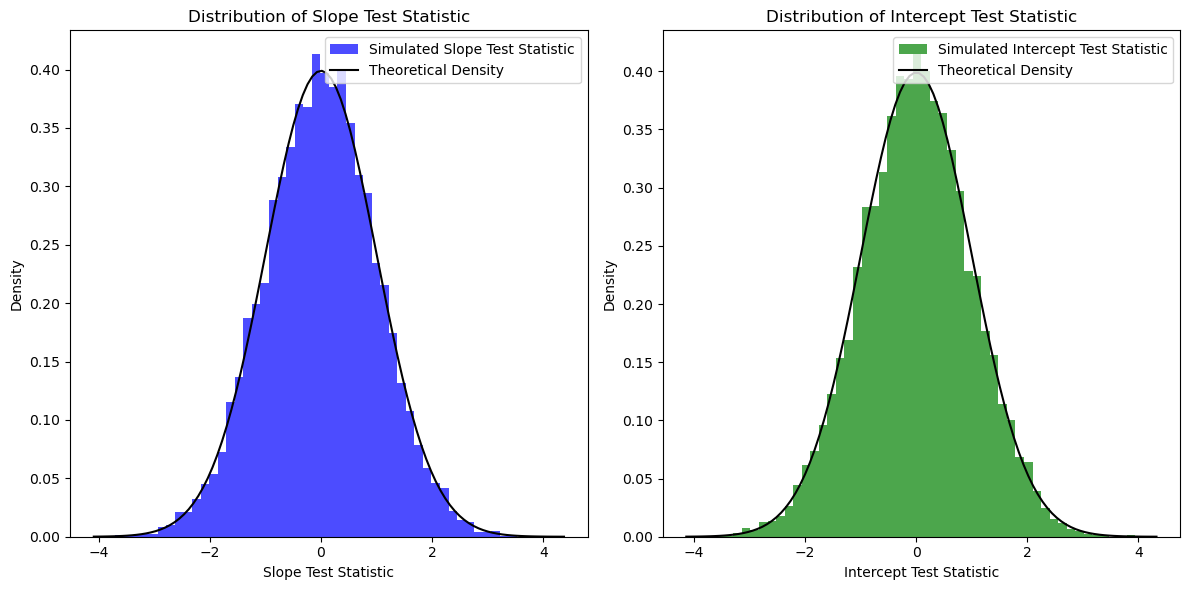

Mean of Slope Test Statistic =  -0.0030331354123882505
Mean of Intercept Test Statistic =  -0.0003533749284724575


In [10]:
# Theoretical parameters
theoretical_slope = a
theoretical_intercept = b

# Compute test statistics
slope_std = np.sqrt((epsilon_std**2) / (np.sum((x - np.mean(x))**2)))
intercept_std = np.std(intercept_values)

slope_test_statistic = (slope_values - theoretical_slope) / slope_std
intercept_test_statistic = (intercept_values - theoretical_intercept) / intercept_std

# Plot histograms for slope test statistics
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(slope_test_statistic, bins=50, density=True, color='blue', alpha=0.7, label='Simulated Slope Test Statistic')

# Plot density curve for slope test statistics
xmin, xmax = plt.xlim()
x_range = np.linspace(xmin, xmax, 100)
slope_theoretical_density = norm.pdf(x_range, loc=0, scale=1)
plt.plot(x_range, slope_theoretical_density, 'k', label='Theoretical Density')

plt.title('Distribution of Slope Test Statistic')
plt.xlabel('Slope Test Statistic')
plt.ylabel('Density')
plt.legend()

# Plot histograms for intercept test statistics
plt.subplot(1, 2, 2)
plt.hist(intercept_test_statistic, bins=50, density=True, color='green', alpha=0.7, label='Simulated Intercept Test Statistic')

# Plot density curve for intercept test statistics
xmin, xmax = plt.xlim()
x_range = np.linspace(xmin, xmax, 100)
intercept_theoretical_density = norm.pdf(x_range, loc=0, scale=1)
plt.plot(x_range, intercept_theoretical_density, 'k', label='Theoretical Density')

plt.title('Distribution of Intercept Test Statistic')
plt.xlabel('Intercept Test Statistic')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

print("Mean of Slope Test Statistic = ", np.mean(slope_test_statistic))
print("Mean of Intercept Test Statistic = ", np.mean(intercept_test_statistic))

We have computed the test-statistics of both distribution of slopes and distribution of intercepts. The histograms are plotted for the test-statistics simulated slope and intercepts along with their respective theoretical density curves. We can observe that both the simulated test statistics and theoretical density curves for both slope and intercept are in the form of normal distribution. This is because we have plotted the theoretical density in such a way that the mean is 0 and standard deviation os 1. Since histograms follow the normal distribution, it is getting aligned with the "Central Limit Theorem". This is because, our simulated slopes and intecepts are getting affected by the distribution of the error term which is also a normal distribution. As we can see that alignment between the histograms and the curves, we can say that there is a consistency with the assumed normal distribution of the test statistics under the null hypothesis. Since, the distribution of theoretical densities is assumed as normal distribution, so its mean is 0 and we can also see that the means os simulated slope test statistics and intercept test statistics is close to zero and hence we can say that the histograms converges with the curve of theoretical densities. In the context of test statistics, when we take a large number of simulations, the narrower the distribution will appear and since we have taken a considerably large number of simulations, our distribution appears to be narrow.

## Part d:

In [11]:
# Significance level
alpha = 0.01

# First Test: H0: a = 1/2 (assuming b = 2)
slope_p_value = 2 * (1 - norm.cdf(np.abs(slope_test_statistic)))
reject_first_test = slope_p_value < alpha

# Second Test: H0: b = 2 (assuming a = 1/2)
intercept_p_value = 2 * (1 - norm.cdf(np.abs(intercept_test_statistic)))
reject_second_test = intercept_p_value < alpha

# Print results
print("First Test Results:")
print(f"p-value for slope test: {slope_p_value}")
print(f"Reject null hypothesis? {reject_first_test}")

print("\nSecond Test Results:")
print(f"p-value for intercept test: {intercept_p_value}")
print(f"Reject null hypothesis? {reject_second_test}")


First Test Results:
p-value for slope test: [0.19859431 0.45774774 0.99192975 ... 0.71647414 0.94642625 0.00162587]
Reject null hypothesis? [False False False ... False False  True]

Second Test Results:
p-value for intercept test: [0.25200364 0.04866039 0.19833194 ... 0.5393924  0.97109651 0.82701866]
Reject null hypothesis? [False False False ... False False False]


Here, we are performing a two-sided test and hence we will need to consider the multiple testing problem. Here, we have performed two tests:
        First test: H0 : a = 1/2 (assuming b = 2)
        Second test: H0 : b = 2 (assuming a = 1/2)
        
We have printed the array of p-values containing the p-values of each simulation. The array of rejecting null hypothesis contains the returned value where we should be rejecting the null hypothesis (True) or we cannot reject the null hypothesis (False).

## Part e:

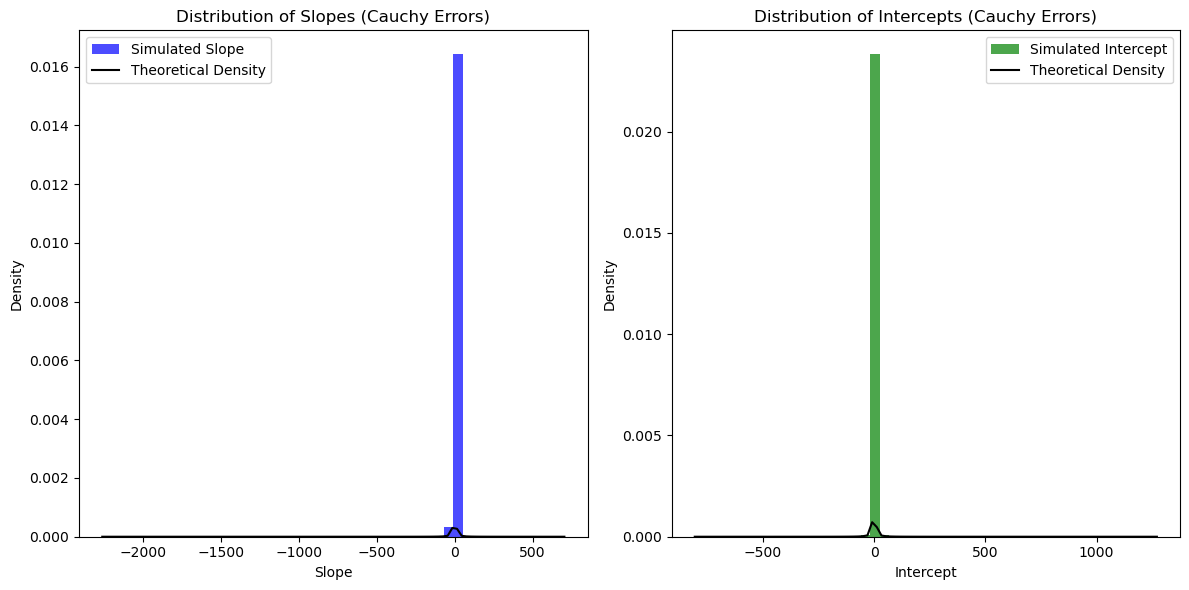

In [12]:
from scipy.stats import cauchy

# Parameters
N = 100
num_simulations = 10000
a = 1/2
b = 2
epsilon_scale = 1/5

# Simulate data and perform regressions
slope_values_cauchy = np.zeros((num_simulations, N))
intercept_values_cauchy = np.zeros((num_simulations, N))

for i in range(num_simulations):
    # Simulate data
    x = np.random.rand(N)
    epsilon = cauchy.rvs(loc=0, scale=epsilon_scale, size=N)
    y = a * x + b + epsilon

    # Perform linear regression
    model_cauchy = np.polyfit(x, y, 1)

    # Collect slope and intercept
    slope_values_cauchy[i] = model_cauchy[0]
    intercept_values_cauchy[i] = model_cauchy[1]

# Plot histograms of slopes and intercepts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(slope_values_cauchy.flatten(), bins=50, density=True, color='blue', alpha=0.7, label='Simulated Slope')

# Plot theoretical density for slopes
x_range_slopes = np.linspace(min(slope_values_cauchy.flatten()), max(slope_values_cauchy.flatten()), 100)
pdf_slopes = cauchy.pdf(x_range_slopes, loc=0, scale=epsilon_scale)
plt.plot(x_range_slopes, pdf_slopes, 'k', label='Theoretical Density')

plt.title('Distribution of Slopes (Cauchy Errors)')
plt.xlabel('Slope')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(intercept_values_cauchy.flatten(), bins=50, density=True, color='green', alpha=0.7, label='Simulated Intercept')

# Plot theoretical density for intercepts
x_range_intercepts = np.linspace(min(intercept_values_cauchy.flatten()), max(intercept_values_cauchy.flatten()), 100)
pdf_intercepts = cauchy.pdf(x_range_intercepts, loc=0, scale=epsilon_scale)
plt.plot(x_range_intercepts, pdf_intercepts, 'k', label='Theoretical Density')

plt.title('Distribution of Intercepts (Cauchy Errors)')
plt.xlabel('Intercept')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


In this distribution, we can see that the for both slope and intercept. This indicates that the simulated values for both slope and intercept are highly concentrated around a single value i.e. 0. In the curve of theoretical density, it also shows a sudden spike in the same area. As compared to the Cauchy distribution, which has heavier tails, we do not have enough simulations which is why even though the curve shows a spike in the same area where the histogram shows, but still the values for densities are different. Since the simulated values are concentrated around 0, we can say that even though we are interpreting with the cauchy distributed errors, the slope and intercept values are close to the true values. 